# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat # para leer archivos .mat
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [4]:
datos = loadmat('data/ejer_1_data1.mat')

In [ ]:
datos

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

#### 3. Create a DataFrame with the features and target

In [16]:
df = pd.DataFrame(datos['X'], columns = ['X1', 'X2'])
df['target'] = datos['y']
df.head()

,X1,X2,target
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


#### 4. Plot a scatterplot with the data

<Axes: xlabel='X1', ylabel='X2'>

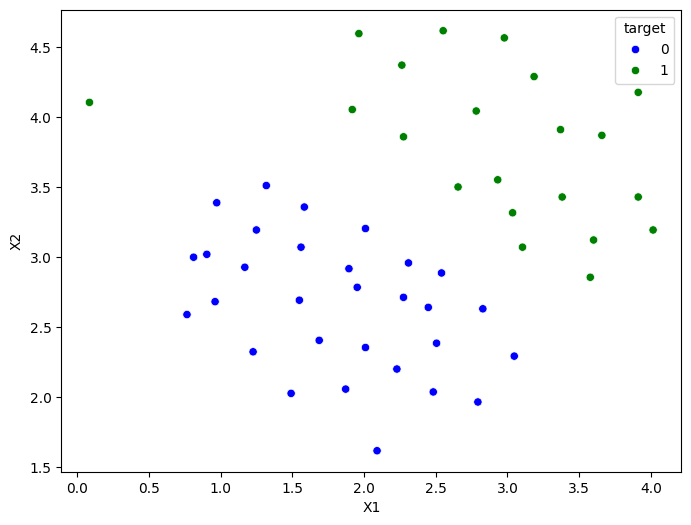

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x = 'X1', y = 'X2', hue = 'target', palette =['blue', 'green'])

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [27]:
svc = LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

In [28]:
X1 = df[['X1', 'X2']]
y1 = df['target']
svc.fit(X1, y1)

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [60]:
prediccion = svc.predict(X1)
print('Acc C=1:', accuracy_score(y1, prediccion))

Acc C=1: 0.9803921568627451


It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [38]:
c = [1, 10, 50, 100, 200, 500, 1000]

for i in c:
    model = LinearSVC(C=i, loss='hinge', max_iter=1000000, random_state=42)
    model.fit(X1, y1)
    accuracy = accuracy_score(y1, model.predict(X1))
    print(i,':', accuracy)

1 : 0.9803921568627451
10 : 0.9803921568627451
50 : 0.9803921568627451
100 : 0.9803921568627451
200 : 0.9803921568627451
500 : 1.0
1000 : 1.0


In [61]:
svc_perfecto = LinearSVC(C=100, loss='hinge', max_iter=100000, random_state=42)
svc_perfecto.fit(X1, y1)
prediccion_perfecto = svc_perfecto.predict(X1)
print('Accuracy con C=100 (el más idóneo):', accuracy_score(y1, prediccion_perfecto))

Accuracy con C=100 (el más idóneo): 0.9803921568627451


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

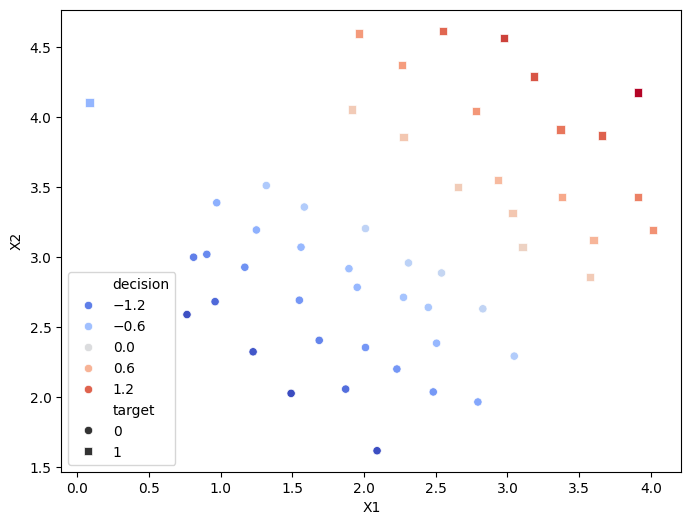

In [51]:
df['decision'] = svc.decision_function(X1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X1', y='X2', hue='decision', palette='coolwarm', style='target', markers={0: 'o', 1: 's'})
plt.show()

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

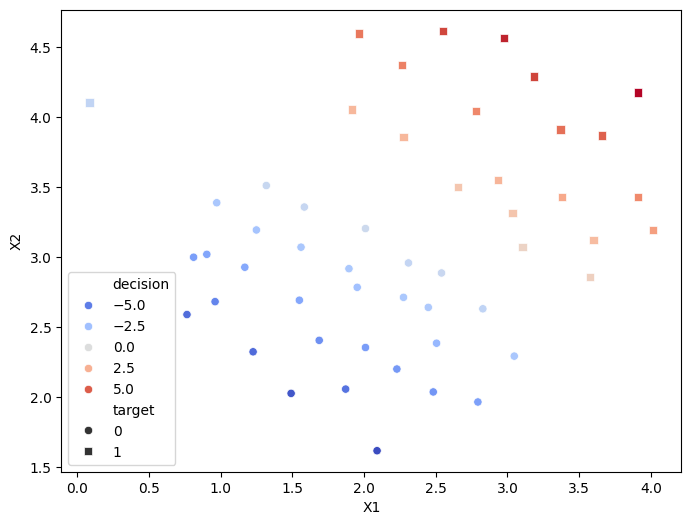

In [52]:
df['decision'] = svc_perfecto.decision_function(X1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X1', y='X2', hue='decision', palette='coolwarm', style='target', markers={0: 'o', 1: 's'})
plt.show()

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [47]:
datos2 = loadmat('data/ejer_1_data2.mat')

#### 2. Create a DataFrame with the features and target

In [49]:
df2 = pd.DataFrame(datos2['X'], columns=['X1', 'X2'])
df2['target'] = datos2['y']

#### 3. Plot a scatterplot with the data

<Axes: xlabel='X1', ylabel='X2'>

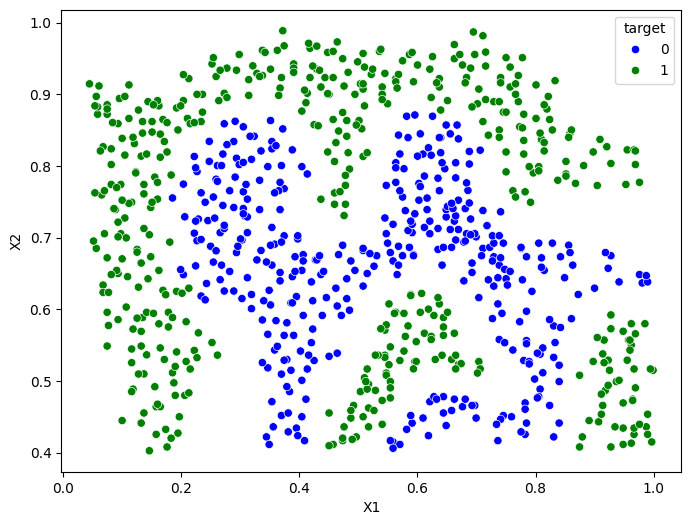

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df2, x = 'X1', y = 'X2', hue = 'target', palette =['blue', 'green'])

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [53]:
svc2 = SVC(C=100, gamma=10, probability=True, random_state=42)

#### 5. Fit the classifier and get the score

In [62]:
X2 = df2[['X1', 'X2']]
y2 = df2['target']
svc2.fit(X2, y2)
prediccion2 = svc2.predict(X2)
print('Acc kernel RBF:', accuracy_score(y2, prediccion2))

Acc kernel RBF: 0.9698725376593279


#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

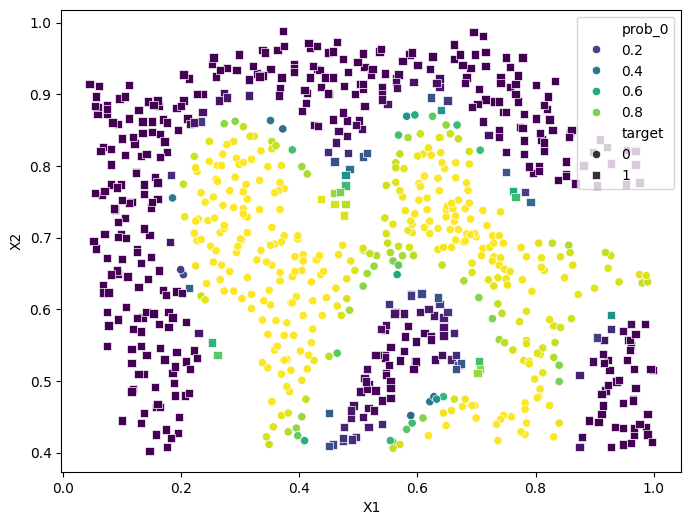

In [69]:
df2['prob_0'] = svc2.predict_proba(X2)[:, 0]
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=df2, x='X1', y='X2', hue='prob_0', palette='viridis', style='target', markers={0: 'o', 1: 's'})
plt.show()